## Установка всех нужных библиотек

In [ ]:
x!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy

## Подключение библиотек

In [115]:
import pandas as pd
import numpy as np

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

## Парсинг данных и предобработка

In [119]:
df = pd.read_csv('../data/whole_data_practice3.csv')
df['type'] = np.where(df['type'].isna(), int(0), int(1))
df = df.dropna()
#df

In [120]:
df.drop(['RAJ2000', 'DEJ2000', 'min_mag', 'max_mag'], axis=1, inplace=True)
df = df.fillna(df.median())
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('type', axis=1))

## Указываем данные для обучения

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, 
    df['type'], 
    test_size=0.2, 
    random_state=42
)

### Функция вывода матрицы несоответствий

In [122]:
def print_mat(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

### Функция для аналитики полученных данных

In [123]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
    #print(f"Сonfusion Matrix: {confusion_matrix(y_test, y_pred)}")
    #plt.savefig(f'../samples/{name}.png', bbox_inches='tight', dpi=300)
    print_mat(confusion_matrix(y_test, y_pred))

## Логистическая регрессия

Logistic Regression:
Accuracy: 0.999
Precision: 0.992
Recall: 1.000
F1-Score: 0.996


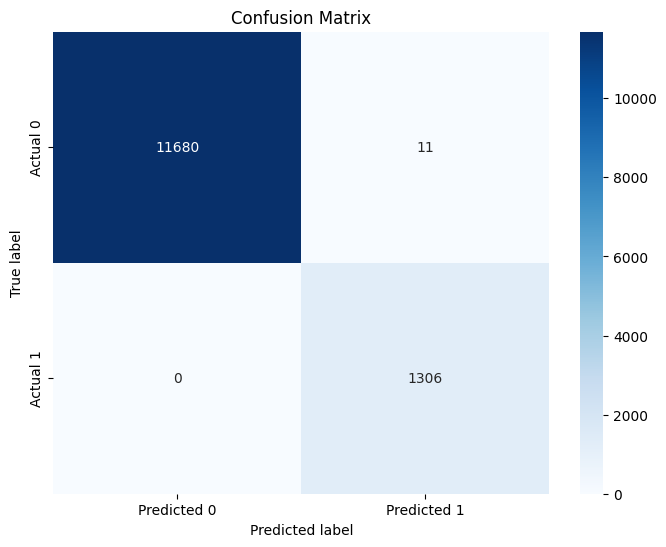

In [124]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic Regression:")
evaluate_model(lr, X_test, y_test, "lr")

## SVM


SVM:
Accuracy: 0.999
Precision: 0.992
Recall: 0.997
F1-Score: 0.994


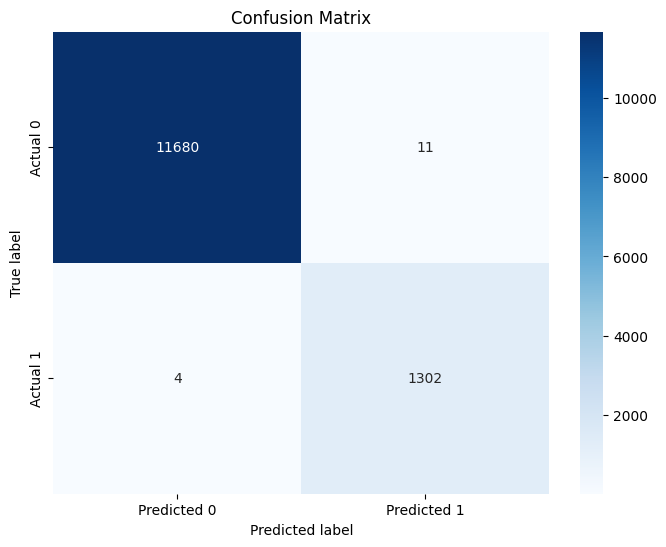

In [125]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
print("\nSVM:")
evaluate_model(svm, X_test, y_test, "svm")

## Случайный лес


Random Forest:
Accuracy: 0.999
Precision: 0.993
Recall: 0.998
F1-Score: 0.995


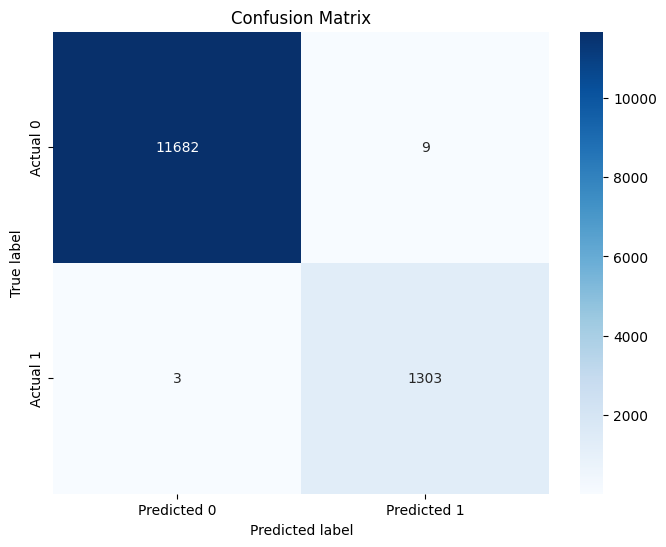

In [126]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("\nRandom Forest:")
evaluate_model(rf, X_test, y_test, "rf")

## Градиентный бустинг


Gradient Boosting:
Accuracy: 0.999
Precision: 0.993
Recall: 0.995
F1-Score: 0.994


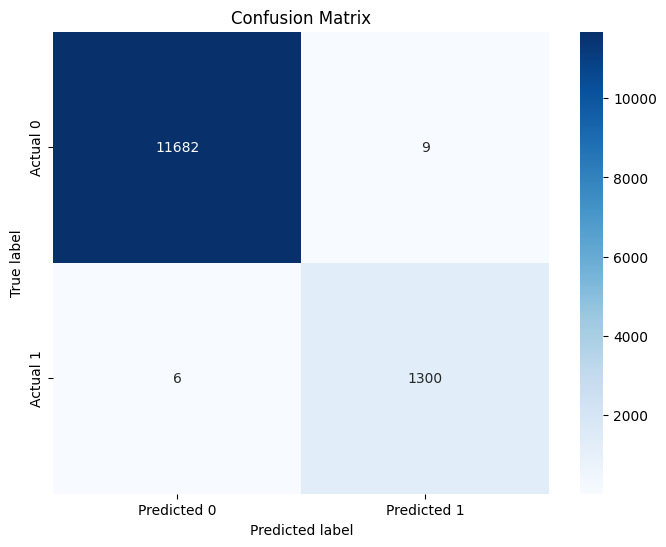

In [127]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print("\nGradient Boosting:")
evaluate_model(gb, X_test, y_test, "gb")